In [ ]:
import pandas as pd
import numpy as np
!pip install -q transformers
df = pd.read_csv('out.csv')

In [ ]:
df.to_csv('output1_400_sentiment.csv')

In [ ]:
model_name="finiteautomata/bertweet-base-sentiment-analysis"
classifier = pipeline('sentiment-analysis', model=model_name)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:

df['score'] = df['ConsumerComplaintNarrative'].map(lambda text: classifier(text,truncation=True))


In [ ]:
text = 'I have a bank of America small business credit card that I had requested to close. However, it was not never processed and the bank charged me the annual fee and late payment fee for XXXX ( from XX/XX/XXXX till XX/XX/XXXX ). I was out of USA during this period and once I returned, I visited the branch in XXXX CA multiple times to get this resolved. I was told the charges will be removed but never got these removed so far. Hence, I am raising the complain.'

In [ ]:
classifier(text, truncation=True)

[{'label': 'NEG', 'score': 0.8758182525634766}]

In [ ]:
text = 'Capital One policies are so inflexible that they refuse to waive more than one late charge regardless of when I receive my funds or their culpability. Capital one also does not have any method for filing a complaint about their methods. Capital One clearly discriminates against the elderly and fixed income people similarly placed as myself. I believe Capital One has treated me unfairly and lied to me multiple times about changing my due date. I request your organization investigate the matter and order Capital One to accept responsibility for their misconduct, refund my unwarranted late fees, and change their policies to account for the special circumstances of elderly and fixed income people. This company lies to its customers, does not document their actions, and is indifferent to the complaints of its customers. It should not be allowed to operate in such a manner.'

In [ ]:
classifier(text, truncation=True)

[{'label': 'NEG', 'score': 0.9675581455230713}]

In [ ]:

df['sentiment'] = df['score'].str[0].str['label']
df['polarity'] = df['score'].str[0].str['score']

In [ ]:
sentiments = df['sentiment'].unique()
for sentiment in sentiments:
    text = df[df['sentiment'] == sentiment]['ConsumerComplaintNarrative'].iloc[0]
    print(f"\nExample text for {sentiment} sentiment:")
    print(text)


Example text for NEG sentiment:
still showing an account that should have been deleted, its been deleted off of the other two credit bureaus but Experian reuses to take it off. The debt has been paid and not suppose to be in my credit report. XXXX XXXX XXXX XXXX  for this company and they corrected the information with the 3 rd party collection agency and with the credit bureaus. ( XXXX XXXX XXXX XXXX XXXX XXXX original creditor ) ) should not be on my credit report!

Example text for NEU sentiment:
I discovered that some of the information on my credit report was incorrect when I reviewed it. Sections 609 ( a ) ( 1 ) ( A ) and 611 ( a ) ( 1 ) require the 3 credit bureaus to validate the accounts ( A ). It is not permissible to fail to validate these reporting accounts as unverified information without providing any proof within the time frame specified by law. My credit report includes the erroneous information that needs to be investigated and correct : XXXX XXXX Date opened XX/XX/2

In [ ]:
text = 'issue is regarding CareCredit a charge taking out of my account on XX/XX/XXXX I received My statement I was alarmed when I saw the charge was for {$500.00} I use this card for my doctors appointment every visit is {$250.00} I have been using my careCredit card at my doctors office since XX/XX/XXXX And if I look back into my statement charge is always {$250.00} I have it set up to automatically comes out of my bank account every month So I never have to pay interest for my visit I called XX/XX/XXXX but XXXX XXXX Never had an exact reason and many excuses When I asked to talk to a manager he said he can refund it Unprofessional And concerning'

In [ ]:
classifier(text, truncation=True)

[{'label': 'NEG', 'score': 0.9371092319488525}]

In [ ]:
text = 'I discovered that some of the information on my credit report was incorrect when I reviewed it. Sections 609 ( a ) ( 1 ) ( A ) and 611 ( a ) ( 1 ) require the 3 credit bureaus to validate the accounts ( A ). It is not permissible to fail to validate these reporting accounts as unverified information without providing any proof within the time frame specified by law. My credit report includes the erroneous information that needs to be investigated and correct : XXXX XXXX Date opened XX/XX/2017 Balance {$150.00} XXXX XXXX Date opened XX/XX/2017 Balance {$0.00} XXXX XXXX XXXX Date opened XX/XX/2017 Balance {$0.00} XXXX XXXX Date opened XX/XX/2017 Balance {$120.00}'

In [ ]:
text = 'On ( XX/XX/2022 ) I sent a letter regarding inaccurate accounts, bankruptcies and unknown things on my credit report. To this day over 60 days later I have not received a response yet. feel like im being taken advantage of and being ignored of my disputes. Section 611 ( a ) it is plainly stated that failure to investigate these items within 30 days gives a reason to immediately remove those items from my credit report. It has been over 60 days so they should be deleted promptly. I demand these accounts be deleted immediately or I will file for litigation due to the stress you caused me. My information was also impacted by the XXXX data breach and may have got into the hands of the wrong person.'

In [ ]:
text = ' On XX/XX/2022 I mailed a letter in regards to inaccurate and unknown items on my credit report. It has been over 30 days and I have yet to receive a response. I feel like my disputes are not being taken seriously, and I feel like I am being taken advantage of. I have researched and found that my disputes are to be investigated within 30 days. Because the investigation has surpassed the timeline required by federal law, the items in disputes must be deleted. If the items are not deleted immediately I will file for litigation for the stress caused. Additionally, my information was also impacted by the XXXX data breach and has most likely gotten into the hands of a malicious person. '

In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    return tokens




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Create a set of stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
  # Split the sentence into individual words
  words = sentence.split()

  # Use a list comprehension to remove stop words
  filtered_words = [word for word in words if word not in stop_words]

  # Join the filtered words back into a sentence
  return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['filtered_ConsumerComplaintNarrative'] = df['ConsumerComplaintNarrative'].apply(remove_stop_words)
df['filtered_ConsumerComplaintNarrative']=df['filtered_ConsumerComplaintNarrative'].str.replace('[^\w\s]','')

<ipython-input-154-407a30bdbc17>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['filtered_ConsumerComplaintNarrative']=df['filtered_ConsumerComplaintNarrative'].str.replace('[^\w\s]','')


In [ ]:
df['tokens'] = df['filtered_ConsumerComplaintNarrative'].apply(tokenize_text)
word_counter = Counter()


In [ ]:
all_words = ' '.join([i for i in df['filtered_ConsumerComplaintNarrative']]).split()

In [ ]:
pd.value_counts(np.array(all_words))

XXXX        7549
I           1780
credit       612
XXXXXXXX     557
account      530
            ... 
invited        1
Crypto         1
webste         1
harmless       1
fined          1
Length: 5077, dtype: int64

In [ ]:
for tokens in df['tokens']:
    word_counter.update(tokens)

In [ ]:
word_count_descending = word_counter.most_common()
word_count_descending

[('xxxx', 7542),
 ('.', 2807),
 ('i', 1838),
 (',', 1777),
 ('credit', 805),
 ('account', 727),
 (')', 679),
 (':', 659),
 ('(', 658),
 ('report', 529),
 ('information', 496),
 ('consumer', 487),
 ('reporting', 422),
 ('xx/xx/xxxx', 373),
 ('$', 344),
 ('{', 341),
 ('}', 341),
 ('15', 331),
 ('section', 288),
 ('the', 287),
 ('a', 226),
 (';', 217),
 ('accounts', 207),
 ('also', 189),
 ('please', 188),
 ('states', 185),
 ('agency', 183),
 ('xxxxxxxx', 183),
 ('date', 168),
 ('1681', 165),
 ('payment', 162),
 ('u.s.c', 162),
 ('balance', 161),
 ('this', 158),
 ('number', 154),
 ('without', 144),
 ('bank', 144),
 ('it', 140),
 ('items', 135),
 ('theft', 134),
 ('usc', 133),
 ('#', 133),
 ('in', 132),
 ('identity', 130),
 ('my', 128),
 ('card', 125),
 ('written', 124),
 ('2', 119),
 ('they', 119),
 ('file', 118),
 ('experian', 117),
 ('act', 117),
 ('remove', 116),
 ('made', 114),
 ('rights', 113),
 ('xx/xx/2022', 112),
 ('never', 112),
 ('received', 111),
 ('fair', 110),
 ('privacy', 109

In [ ]:
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
nltk.download('wordnet')

positive_words = []
negative_words = []

for word in word_counter.keys():
    synsets = list(swn.senti_synsets(word))
    if synsets:
        sentiment_scores = [synset.pos_score() - synset.neg_score() for synset in synsets]
        max_score = max(sentiment_scores)
        if max_score > 0:
            positive_words.append(word)
        elif max_score < 0:
            negative_words.append(word)



[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def count_negative_words(text):
    tokenized_words = word_tokenize(text.lower())

    count = sum(1 for word in tokenized_words if word in negative_words)

    return count

In [ ]:
def count_positive_words(text):
    tokenized_words = word_tokenize(text.lower())

    count = sum(1 for word in tokenized_words if word in positive_words)

    return count

In [ ]:
negative_complaints = df[df['sentiment'] == 'NEG']
negative_complaints['Negative Word Count'] = negative_complaints['ConsumerComplaintNarrative'].apply(count_negative_words)

<ipython-input-234-094c35451cc9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
negative_complaints[['ConsumerComplaintNarrative','sentiment','Negative Word Count']].sort_values(by='Negative Word Count',ascending=False)

,ConsumerComplaintNarrative,sentiment,Negative Word Count
296,IN care of XXXX XXXX doing business as Experia...,NEG,38
27,XX/XX/XXXX Recent unfair and incorrect busines...,NEG,35
70,Hi I am submitting this XXXX XXXX this isn't a...,NEG,33
85,Per 15 USC 6805 and FCRA and as a federally pr...,NEG,31
11,I was in the process of applying for new emplo...,NEG,24
...,...,...,...
394,This Company is violating 15 U.S. Code 1681b b...,NEG,0
206,"ProCollect , INC . this collection agency tryi...",NEG,0
86,I opened checking account with Citi based on t...,NEG,0
3,My personal checking account was closed in XXX...,NEG,0


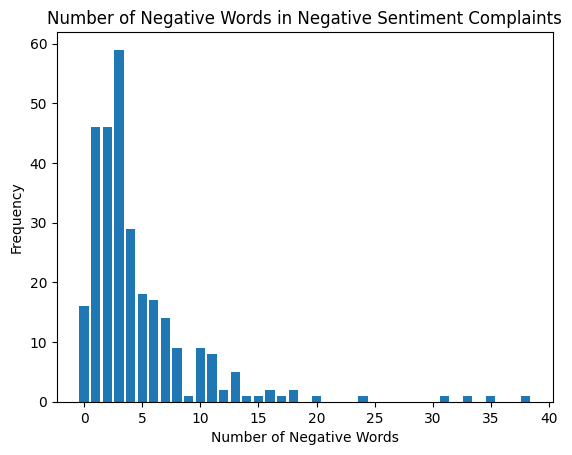

<Figure size 640x480 with 0 Axes>

In [ ]:
word_count_freq = negative_complaints['Negative Word Count'].value_counts().sort_index()

# Create a bar plot
plt.bar(word_count_freq.index, word_count_freq.values)
plt.xlabel('Number of Negative Words')
plt.ylabel('Frequency')
plt.title('Number of Negative Words in Negative Sentiment Complaints')
plt.show()
plt.savefig('num_neg_words_neg_sent.png',bbox_inches='tight')

<ipython-input-230-c66334656f51>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



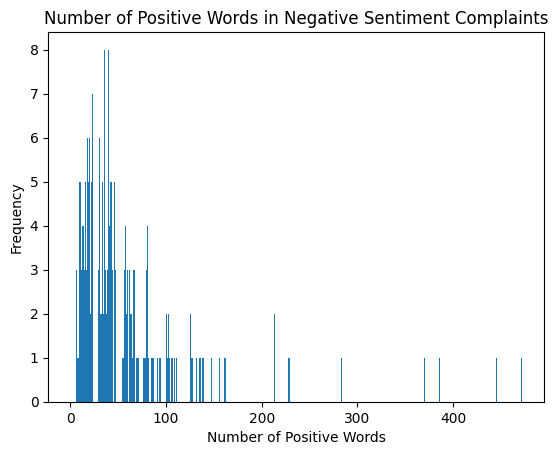

<Figure size 640x480 with 0 Axes>

In [ ]:
negative_complaints = df[df['sentiment'] == 'NEG']
negative_complaints['Positive Word Count'] = negative_complaints['ConsumerComplaintNarrative'].apply(count_positive_words)
negative_complaints[['ConsumerComplaintNarrative','sentiment','Positive Word Count']].sort_values(by='Positive Word Count',ascending=False)

word_count_freq = negative_complaints['Positive Word Count'].value_counts().sort_index()

# Create a bar plot
plt.bar(word_count_freq.index, word_count_freq.values)
plt.xlabel('Number of Positive Words')
plt.ylabel('Frequency')
plt.title('Number of Positive Words in Negative Sentiment Complaints')
plt.show()
plt.savefig('num_pos_words_neg_sent.png',bbox_inches='tight')

In [ ]:
def extract_negative_words(text):
    tokenized_words = word_tokenize(text.lower())
    negative_words_in_text = [word for word in tokenized_words if word in negative_words]
    return negative_words_in_text

<ipython-input-241-c4e5b423f28c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



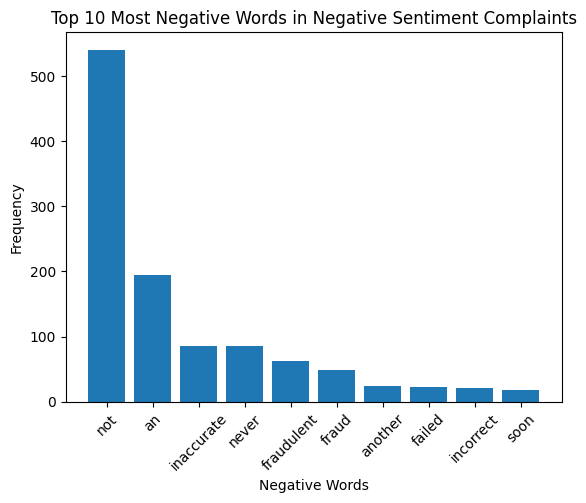

In [ ]:
negative_complaints['Negative Words'] = negative_complaints['ConsumerComplaintNarrative'].apply(extract_negative_words)
all_negative_words = [word for sublist in negative_complaints['Negative Words'] for word in sublist]
negative_word_counts = pd.Series(all_negative_words).value_counts()
most_negative_words = negative_word_counts.head(10)
plt.bar(most_negative_words.index, most_negative_words.values)
plt.xlabel('Negative Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Negative Words in Negative Sentiment Complaints')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pd.value_counts(np.array(positive_words))

credit         589
account        453
information    402
report         335
reporting      304
              ... 
proving          1
reaches          1
base             1
randomly         1
ridiculous       1
Length: 1871, dtype: int64

In [ ]:
pd.value_counts(np.array(negative_words))

never           107
fraudulent       67
inaccurate       63
fraud            44
another          43
               ... 
bypassed          1
horrible          1
vandalism         1
Unauthorized      1
misusing          1
Length: 149, dtype: int64

In [ ]:

#generate mean of sentiment_score by period
issue_sentiment = df.groupby(["Issue", "sentiment"]).size().reset_index(name='Freq')

In [ ]:
issue_sentiment.sort_values(by=['Freq'],ascending=False)

,Issue,sentiment,Freq
25,Incorrect information on your report,NEG,85
23,Improper use of your report,NEG,67
36,Problem with a credit reporting company's inve...,NEG,55
24,Improper use of your report,NEU,25
26,Incorrect information on your report,NEU,19
37,Problem with a credit reporting company's inve...,NEU,16
28,Managing an account,NEG,14
2,Attempts to collect debt not owed,NEG,13
48,Trouble during payment process,NEG,10
49,Trouble during payment process,NEU,6


In [ ]:
neg_issue_sentiment=issue_sentiment[issue_sentiment['sentiment']=='NEG'].sort_values(by='Freq',ascending=False).head(5)
neg_issue_sentiment

,Issue,sentiment,Freq
25,Incorrect information on your report,NEG,85
23,Improper use of your report,NEG,67
36,Problem with a credit reporting company's inve...,NEG,55
28,Managing an account,NEG,14
2,Attempts to collect debt not owed,NEG,13


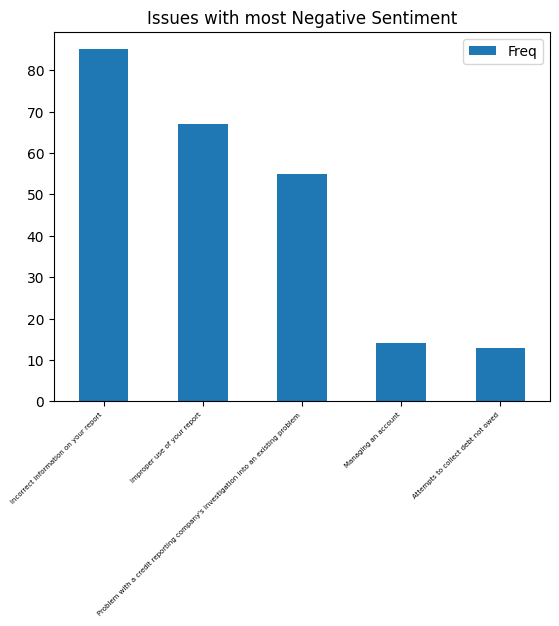

In [ ]:
ax = neg_issue_sentiment[['Issue','Freq']].plot(kind='bar', title ='Issues with most Negative Sentiment')
ax.set_xticklabels(neg_issue_sentiment.Issue,size=5,rotation=45,ha='right')
plt.savefig('foo.png',bbox_inches='tight')

#neg_issue_sentiment[['Issue','Freq']].plot(kind='bar',title='Issues with most Negative Sentiment')

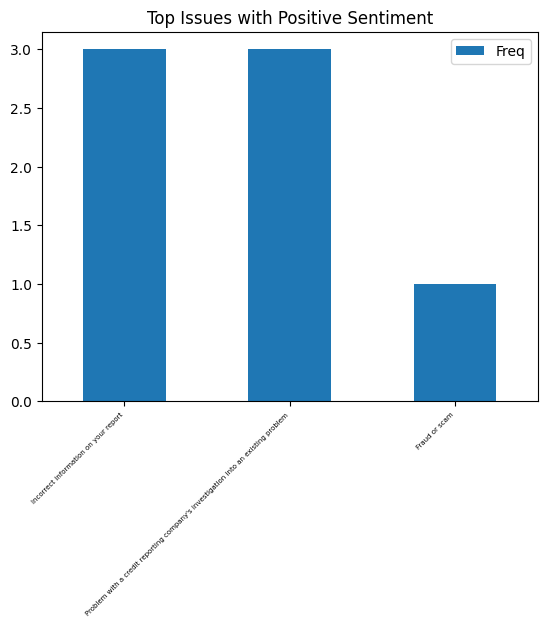

In [ ]:
pos_issue_sentiment=issue_sentiment[issue_sentiment['sentiment']=='POS'].sort_values(by='Freq',ascending=False).head(5)
ax = pos_issue_sentiment[['Issue','Freq']].plot(kind='bar', title ='Top Issues with Positive Sentiment')
ax.set_xticklabels(pos_issue_sentiment.Issue,size=5,rotation=45,ha='right')
plt.savefig('pos_issues.png',bbox_inches='tight')


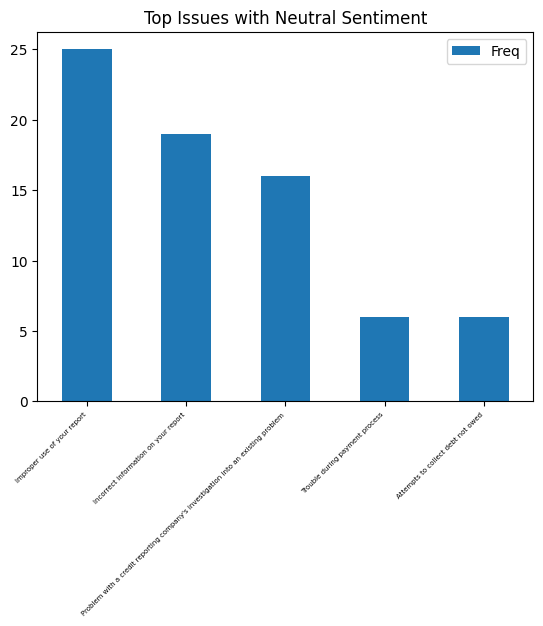

In [ ]:
neu_issue_sentiment=issue_sentiment[issue_sentiment['sentiment']=='NEU'].sort_values(by='Freq',ascending=False).head(5)
ax = neu_issue_sentiment[['Issue','Freq']].plot(kind='bar', title ='Top Issues with Neutral Sentiment')
ax.set_xticklabels(neu_issue_sentiment.Issue,size=5,rotation=45,ha='right')
plt.savefig('neu_issues.png',bbox_inches='tight')


In [ ]:
company_sentiment = df.groupby(["Company", "sentiment"]).size().reset_index(name='Freq')
company_sentiment=company_sentiment.sort_values(by=['Freq'],ascending=False)
company_sentiment

,Company,sentiment,Freq
26,Experian Information Solutions Inc.,NEG,113
68,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NEG,61
27,Experian Information Solutions Inc.,NEU,32
79,WELLS FARGO & COMPANY,NEG,17
69,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NEU,16
...,...,...,...
1,"Aargon Agency, Inc.",NEG,1
42,Kingston Data & Credit International Inc.,NEG,1
45,"LoanCare, LLC",NEG,1
46,"LoanCare, LLC",NEU,1


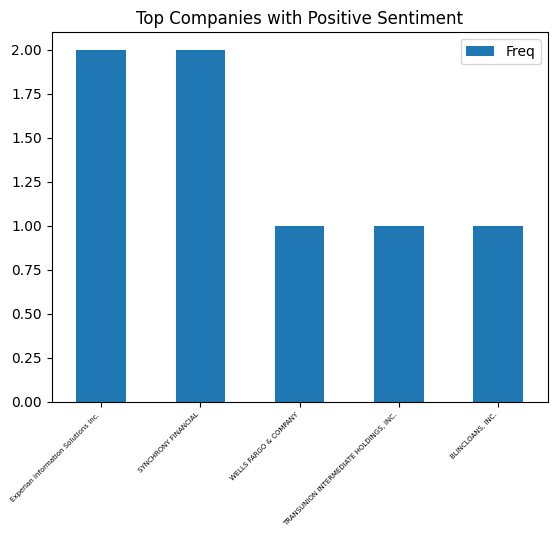

In [ ]:
pos_company_sentiment=company_sentiment[company_sentiment['sentiment']=='POS'].sort_values(by='Freq',ascending=False).head(5)
ax = pos_company_sentiment[['Company','Freq']].plot(kind='bar', title ='Top Companies with Positive Sentiment')
ax.set_xticklabels(pos_company_sentiment.Company,size=5,rotation=45,ha='right')
plt.savefig('pos_comp.png',bbox_inches='tight')

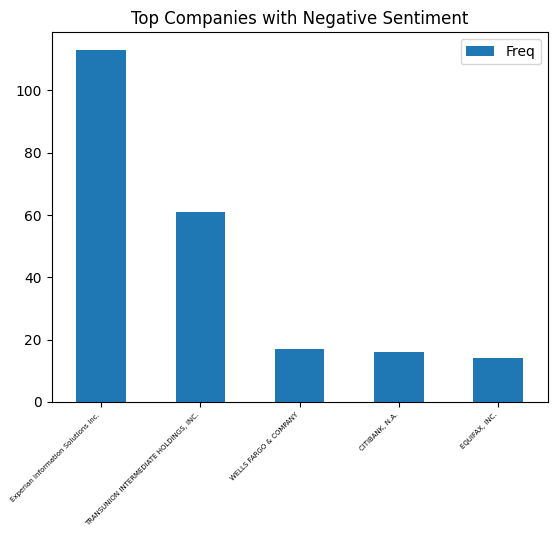

In [ ]:
neg_company_sentiment=company_sentiment[company_sentiment['sentiment']=='NEG'].sort_values(by='Freq',ascending=False).head(5)
ax = neg_company_sentiment[['Company','Freq']].plot(kind='bar', title ='Top Companies with Negative Sentiment')
ax.set_xticklabels(neg_company_sentiment.Company,size=5,rotation=45,ha='right')
plt.savefig('neg_companies.png',bbox_inches='tight')

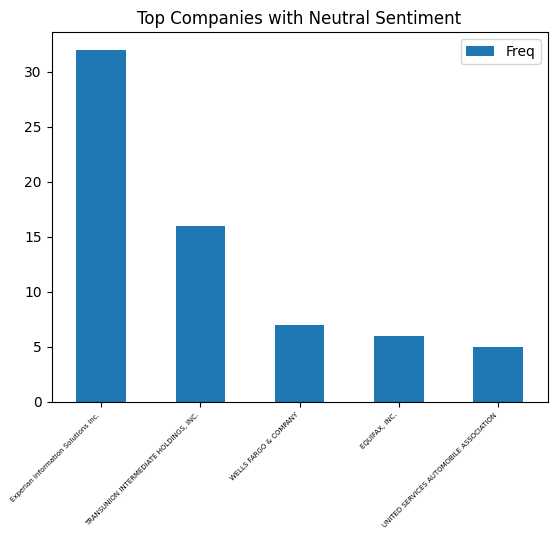

In [ ]:
neu_company_sentiment=company_sentiment[company_sentiment['sentiment']=='NEU'].sort_values(by='Freq',ascending=False).head(5)
ax = neu_company_sentiment[['Company','Freq']].plot(kind='bar', title ='Top Companies with Neutral Sentiment')
ax.set_xticklabels(neu_company_sentiment.Company,size=5,rotation=45,ha='right')
plt.savefig('neu_companies.png',bbox_inches='tight')

In [ ]:
distribution = pd.DataFrame(df.groupby('sentiment')['ConsumerComplaintNarrative'].count()).reset_index()
#distribution.columns = ['sentiment','count']
distribution['Percentage'] = distribution['ConsumerComplaintNarrative']/distribution['ConsumerComplaintNarrative'].sum()*100


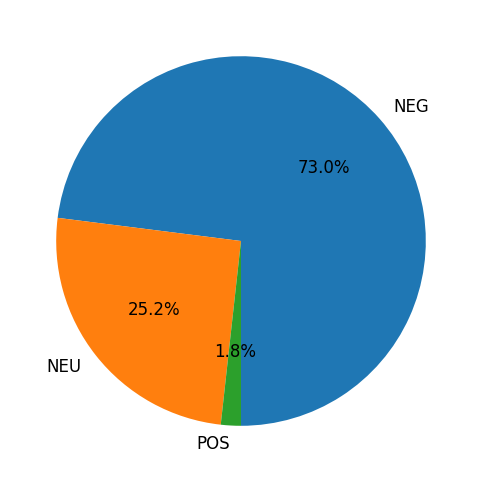

In [ ]:
from matplotlib import pyplot as plt

#fig = plt.figure(figsize =(10, 7))
sentiment_counts = df.groupby(['sentiment']).size()
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")
plt.savefig('sentiment_distribution.png',bbox_inches='tight')

# show plot
plt.show()

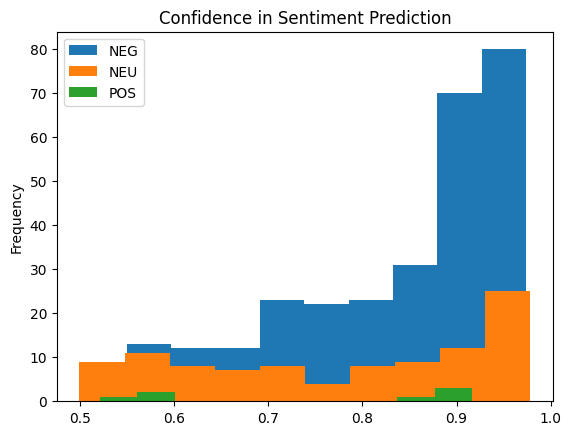

In [ ]:
#Distribution of all three sentiments

df.groupby('sentiment')['polarity'].plot(kind='hist',legend=True, title='Confidence in Sentiment Prediction')
plt.savefig('Confidence.png',bbox_inches='tight')


In [ ]:
#Most commonly used words with each sentiment

neg_complaints = pd.DataFrame(df[df['sentiment']=='NEG']['filtered_ConsumerComplaintNarrative'])
#neg_complaints['tokens'] = neg_complaints['filtered_ConsumerComplaintNarrative'].apply(tokenize_text)
all_neg_words = ' '.join([i for i in neg_complaints['filtered_ConsumerComplaintNarrative']]).split()
most_freq_words_in_neg = pd.DataFrame(pd.value_counts(np.array(all_neg_words)))
most_freq_words_in_neg.head(20)

,0
XXXX,5818
I,1216
credit,446
XXXXXXXX,441
information,398
consumer,391
report,386
account,368
15,286
reporting,271


In [ ]:
#Most commonly used words with each sentiment

pos_complaints = pd.DataFrame(df[df['sentiment']=='POS']['filtered_ConsumerComplaintNarrative'])
#neg_complaints['tokens'] = neg_complaints['filtered_ConsumerComplaintNarrative'].apply(tokenize_text)
all_pos_words = ' '.join([i for i in pos_complaints['filtered_ConsumerComplaintNarrative']]).split()
most_freq_words_in_pos = pd.DataFrame(pd.value_counts(np.array(all_pos_words)))
most_freq_words_in_pos.head(20)

,0
XXXX,126
I,61
credit,21
account,13
late,10
payments,9
company,9
made,8
items,8
XXXXXXXX,8


In [ ]:
#Most commonly used words with each sentiment

neu_complaints = pd.DataFrame(df[df['sentiment']=='NEU']['filtered_ConsumerComplaintNarrative'])
#neg_complaints['tokens'] = neg_complaints['filtered_ConsumerComplaintNarrative'].apply(tokenize_text)
all_neu_words = ' '.join([i for i in neu_complaints['filtered_ConsumerComplaintNarrative']]).split()
most_freq_words_in_neu = pd.DataFrame(pd.value_counts(np.array(all_neu_words)))
most_freq_words_in_neu.head(20)

,0
XXXX,1605
I,503
account,149
credit,145
XXXXXXXX,108
report,99
information,77
consumer,77
The,65
payment,50


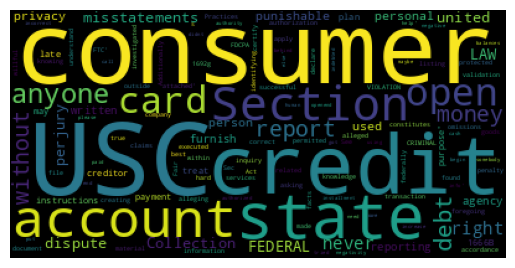

In [ ]:
neu_complaints=neu_complaints[ neu_complaints[ 'filtered_ConsumerComplaintNarrative' ].str.contains( "XXXX" )==False ]

text = neu_complaints['filtered_ConsumerComplaintNarrative'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

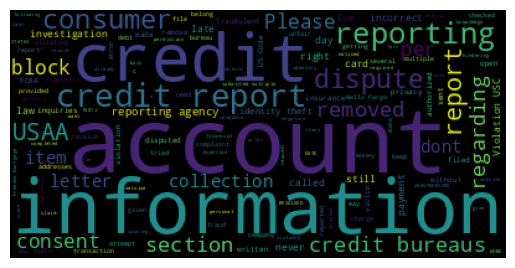

In [ ]:
neg_complaints=neg_complaints[ neg_complaints[ 'filtered_ConsumerComplaintNarrative' ].str.contains( "XXXX" )==False ]

text = neg_complaints['filtered_ConsumerComplaintNarrative'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

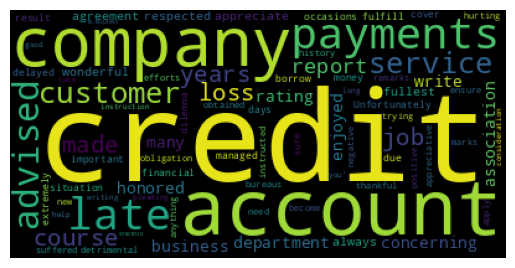

In [ ]:
pos_complaints=pos_complaints[ pos_complaints[ 'filtered_ConsumerComplaintNarrative' ].str.contains( "XXXX" )==False ]

text = pos_complaints['filtered_ConsumerComplaintNarrative'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
most_freq_words_in_neu.reset_index(inplace=True)
most_freq_words_in_neu.rename(columns = {'index':'word',0:'count'}, inplace = True)


In [ ]:
most_freq_words_in_neu

,word,count
0,XXXX,1605
1,I,503
2,account,149
3,credit,145
4,XXXXXXXX,108
...,...,...
2408,rectify,1
2409,repeated,1
2410,minimize,1
2411,double,1


In [ ]:

#Emotion Analysis

from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline
import tensorflow as tf

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model_1 = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion_1 = pipeline('sentiment-analysis',
                    model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
def get_top_3_emotions_1(text):
    truncated_text = tokenizer(text, truncation=True, padding='longest', max_length=512, return_tensors="tf")
    input_ids = truncated_text["input_ids"]
    attention_mask = truncated_text["attention_mask"]
    outputs = model_1(input_ids, attention_mask=attention_mask)
    predicted_probabilities = tf.nn.softmax(outputs.logits, axis=1).numpy()[0]
    emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
                'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
                'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
                'remorse', 'sadness', 'surprise', 'neutral']
    top_3_emotions = sorted(zip(emotions, predicted_probabilities), key=lambda x: x[1], reverse=True)[:3]
    return top_3_emotions

In [ ]:
df['Top_Emotions_Roberta'] = df['ConsumerComplaintNarrative'].apply(get_top_3_emotions_1)

# Print the DataFrame to see the top 3 emotions for each text
#print(df)

In [ ]:
df[['ConsumerComplaintNarrative','Top_Emotions_Roberta']].head()

,ConsumerComplaintNarrative,Top_Emotions_Roberta
0,still showing an account that should have been...,"[(neutral, 0.99545985), (realization, 0.001174..."
1,I discovered that some of the information on m...,"[(realization, 0.9793595), (neutral, 0.0173687..."
2,"Regardless of the multiple written requests, t...","[(neutral, 0.7483674), (disapproval, 0.2198075..."
3,My personal checking account was closed in XXX...,"[(neutral, 0.90205103), (approval, 0.079757325..."
4,Hi Experian is reporting fraudulent inquires o...,"[(approval, 0.72622764), (neutral, 0.13873786)..."


In [ ]:
df['Top_3_Emotions'] = df['Top_Emotions_Roberta'].apply(lambda x: ', '.join([emotion[0] for emotion in x[:3]]))
df.head()
df.to_csv('output.csv')

In [ ]:
import pandas as pd

# Load the DataFrame with sentiment and emotion columns
#df = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with the actual file path
df['TopEmotion'] = df['Top_Emotions_Roberta'].apply(lambda x: x[0][0])
# Create a crosstab to summarize the count of sentiment and emotion combinations
summary = pd.crosstab(df['sentiment'], df['TopEmotion'])


In [ ]:
summary

TopEmotion,admiration,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,excitement,fear,gratitude,nervousness,neutral,pride,realization,sadness,surprise
sentiment,,,,,,,,,,,,,,,,,,,
NEG,2,4,7,26,5,13,5,3,3,48,1,1,16,1,130,1,13,11,2
NEU,0,1,0,9,1,1,3,1,1,11,0,1,8,0,52,0,10,2,0
POS,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
text = 'Their response despite their neglect and indifference to my request is to say pay on your bill prior to the late date. Capital One policies are so inflexible that they refuse to waive more than one late charge regardless of when I receive my funds or their culpability. Capital one also does not have any method for filing a complaint about their methods. Capital One clearly discriminates against the elderly and fixed income people similarly placed as myself. I believe Capital One has treated me unfairly and lied to me multiple times about changing my due date. I request your organization investigate the matter and order Capital One to accept responsibility for their misconduct, refund my unwarranted late fees, and change their policies to account for the special circumstances of elderly and fixed income people. This company lies to its customers, does not document their actions, and is indifferent to the complaints of its customers. It should not be allowed to operate in such a manner.'


In [ ]:
text='I have a bank of America small business credit card that I had requested to close. However, it was not never processed and the bank charged me the annual fee and late payment fee for XXXX ( from XX/XX/XXXX till XX/XX/XXXX ). I was out of USA during this period and once I returned, I visited the branch in XXXX CA multiple times to get this resolved. I was told the charges will be removed but never got these removed so far. Hence, I am raising the complain'

In [ ]:
get_top_3_emotions_1(text)

[('neutral', 0.74184865), ('approval', 0.20415036), ('desire', 0.020241706)]

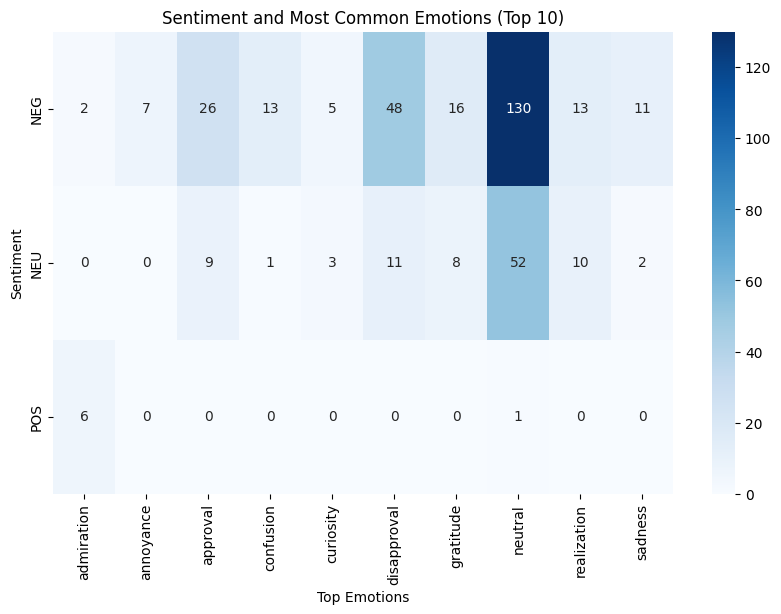

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame with sentiment and emotion columns
#df = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with the actual file path

# Get the count of each emotion
emotion_counts = df['TopEmotion'].explode().value_counts()

# Filter the top N most common emotions
top_n = 10  # Number of most common emotions to consider
top_emotions = emotion_counts.head(top_n).index.tolist()

# Filter the DataFrame to include only the top emotions
df_top_emotions = df[df['TopEmotion'].str.contains('|'.join(top_emotions))]

# Create a crosstab to summarize the count of sentiment and emotion combinations
summary = pd.crosstab(df_top_emotions['sentiment'], df_top_emotions['TopEmotion'])

# Create a heatmap to visualize the crosstab
plt.figure(figsize=(10, 6))
sns.heatmap(summary, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Top Emotions')
plt.ylabel('Sentiment')
plt.title(f'Sentiment and Most Common Emotions (Top {top_n})')
plt.show()
plt.savefig('emotion_sent_mapping.png',bbox_inches='tight')


In [ ]:
df.columns

Index(['DateReceived', 'Product', 'SubProduct', 'Issue', 'SubIssue',
       'ConsumerComplaintNarrative', 'Company', 'State', 'ZIPCode',
       'SubmittedVia', 'CompanyResponseToConsumer', 'TimelyResponse',
       'ConsumerDisputed', 'Top 3 Emotions', 'Top_Emotions_Roberta', 'Emotion',
       'TopEmotions_DistillRoberta', 'sentiment', 'score', 'polarity',
       'Top_3_Emotions', 'TopEmotion'],
      dtype='object')

In [ ]:
df2 = df[['DateReceived', 'Product', 'SubProduct', 'Issue', 'SubIssue',
       'ConsumerComplaintNarrative', 'Company', 'State', 'ZIPCode',
       'SubmittedVia', 'CompanyResponseToConsumer', 'TimelyResponse',
       'ConsumerDisputed','sentiment','Top_Emotions_Roberta','Top_3_Emotions', 'Emotion']]


df2.to_csv('sentiment_emotion_results.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_emotion(df, emotion_number):
    # Get the top emotion for each text
    df['Emotion'] = df['Top_Emotions_Roberta'].apply(lambda x: x[emotion_number-1][0])

    # Count the occurrences of each top emotion
    emotion_counts = df['Emotion'].value_counts()

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(emotion_counts.index, emotion_counts.values)
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.title(f'Emotion Number {emotion_number} for Each Text')
    plt.xticks(rotation=45,ha='right')
    plt.savefig('top_emotion.png',bbox_inches='tight')
    plt.show()


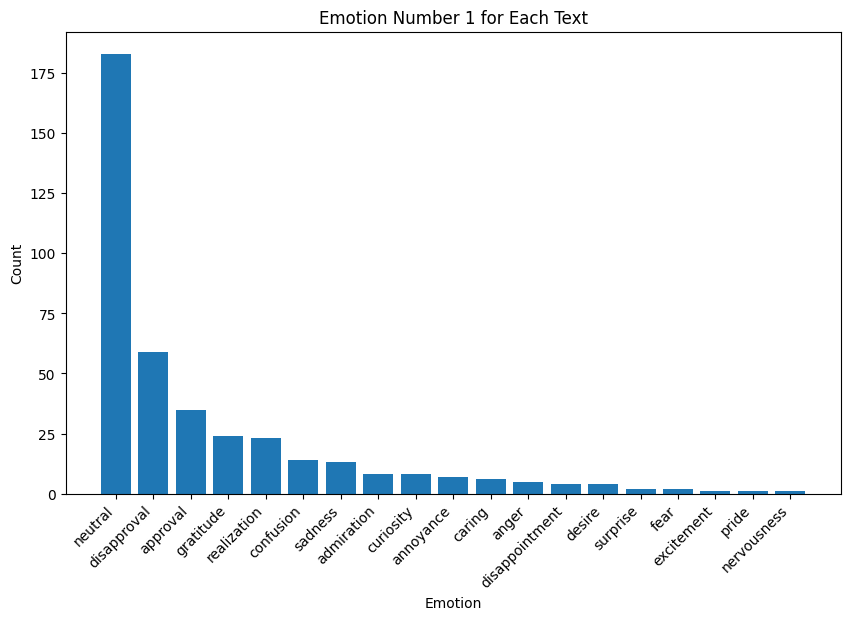

In [ ]:
plot_top_emotion(df,1)

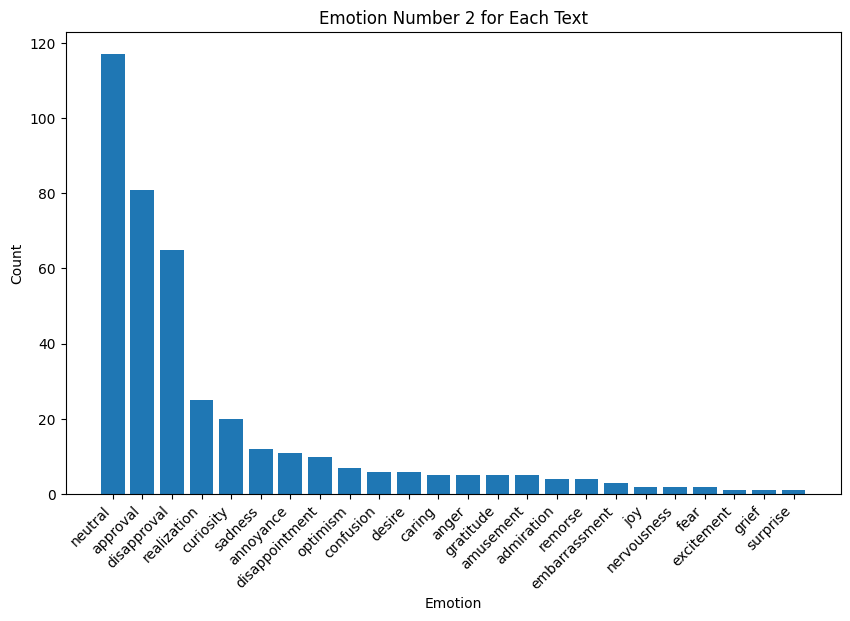

In [ ]:
plot_top_emotion(df,2)

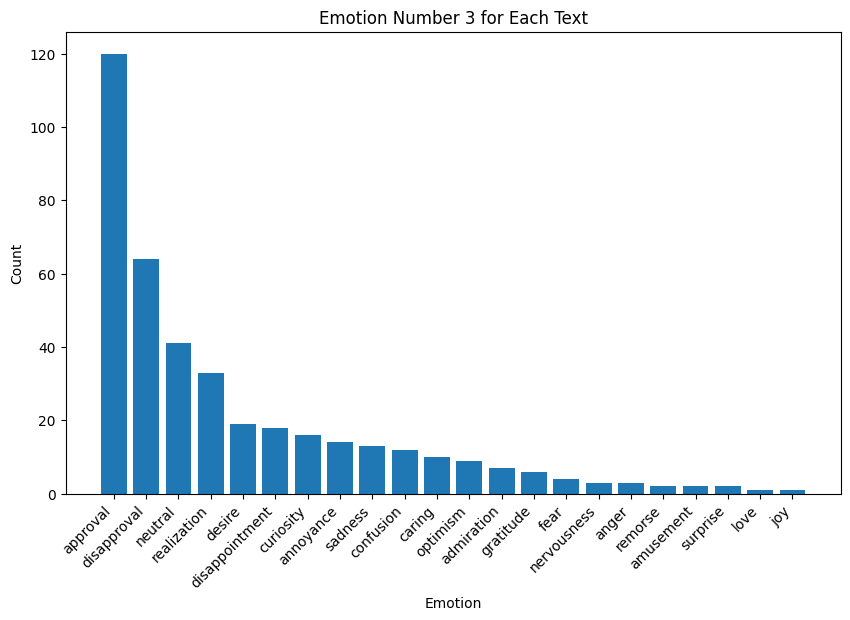

In [ ]:
plot_top_emotion(df,3)

In [ ]:
import pandas as pd

# Load the DataFrame with the text column and top emotions
#df = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with the actual file path

# Create a dictionary to store one example text for each top emotion
example_texts = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    emotions = row['Top_Emotions_Roberta']  # Replace 'Top 3 Emotions' with the actual column name containing the emotions

    # Iterate over each emotion in the top emotions list
    for i, emotion in enumerate(emotions, start=1):
        if emotion[0] not in example_texts:
            example_texts[emotion[0]] = row['ConsumerComplaintNarrative']  # Replace 'text_column' with the actual column name containing the text
            break

# Print the example texts for each top emotion
for emotion, text in example_texts.items():
    print(f"Top Emotion: {emotion}")
    print(f"Example Text: {text}")
    print()


Top Emotion: neutral
Example Text: still showing an account that should have been deleted, its been deleted off of the other two credit bureaus but Experian reuses to take it off. The debt has been paid and not suppose to be in my credit report. XXXX XXXX XXXX XXXX  for this company and they corrected the information with the 3 rd party collection agency and with the credit bureaus. ( XXXX XXXX XXXX XXXX XXXX XXXX original creditor ) ) should not be on my credit report!

Top Emotion: realization
Example Text: I discovered that some of the information on my credit report was incorrect when I reviewed it. Sections 609 ( a ) ( 1 ) ( A ) and 611 ( a ) ( 1 ) require the 3 credit bureaus to validate the accounts ( A ). It is not permissible to fail to validate these reporting accounts as unverified information without providing any proof within the time frame specified by law. My credit report includes the erroneous information that needs to be investigated and correct : XXXX XXXX Date opene

In [ ]:
text = 'I have a bank of America small business credit card that I had requested to close. However, it was not never processed and the bank charged me the annual fee and late payment fee for XXXX ( from XX/XX/XXXX till XX/XX/XXXX ). I was out of USA during this period and once I returned, I visited the branch in XXXX CA multiple times to get this resolved. I was told the charges will be removed but never got these removed so far. Hence, I am raising the complain.'

In [ ]:
get_top_3_emotions_1(text)

[('neutral', 0.72326696), ('approval', 0.22421198), ('desire', 0.015132094)]

In [ ]:
text = 'still showing an account that should have been deleted, its been deleted off of the other two credit bureaus but Experian reuses to take it off. The debt has been paid and not suppose to be in my credit report. XXXX XXXX XXXX XXXX  for this company and they corrected the information with the 3 rd party collection agency and with the credit bureaus. ( XXXX XXXX XXXX XXXX XXXX XXXX original creditor ) ) should not be on my credit report!'

In [ ]:
get_top_3_emotions(text)

[('neutral', 0.99545985),
 ('realization', 0.0011747759),
 ('approval', 0.0010934905)]

In [ ]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
model_2 = TFRobertaForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")


Emotion_distilroberta = pipeline('sentiment-analysis', model="j-hartmann/emotion-english-distilroberta-base")
emotions = ['anger', 'joy', 'optimism', 'sadness', 'love', 'surprise', 'fear', 'disgust']




# Define the function to get the top 3 emotions for a given text
def get_top_3_emotions_2(text):
    truncated_text = tokenizer(text, truncation=True, padding='longest', max_length=512, return_tensors="tf")
    input_ids = truncated_text["input_ids"]
    attention_mask = truncated_text["attention_mask"]
    outputs = model_2(input_ids, attention_mask=attention_mask)
    predicted_probabilities = tf.nn.softmax(outputs.logits, axis=1).numpy()[0]
    emotions = ['anger', 'joy', 'optimism', 'sadness', 'love', 'surprise', 'fear', 'disgust']
    top_3_emotions = sorted(zip(emotions, predicted_probabilities), key=lambda x: x[1], reverse=True)[:3]
    return ', '.join([emotion[0] for emotion in top_3_emotions])

# Apply the function to the text column in the DataFrame
df['TopEmotions_DistillRoberta'] = df['ConsumerComplaintNarrative'].apply(get_top_3_emotions)




All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
import pandas as pd

# Load the DataFrame with the text column and top emotions
#df = pd.read_csv('your_data.csv')  # Replace 'your_data.csv' with the actual file path

# Create a dictionary to store one example text for each top emotion
example_texts = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    emotions = row['TopEmotions_DistillRoberta']  # Replace 'Top 3 Emotions' with the actual column name containing the emotions

    # Iterate over each emotion in the top emotions list
    for i, emotion in enumerate(emotions, start=1):
        if emotion[0] not in example_texts:
            example_texts[emotion[0]] = row['ConsumerComplaintNarrative']  # Replace 'text_column' with the actual column name containing the text
            break

# Print the example texts for each top emotion
for emotion, text in example_texts.items():
    print(f"Top Emotion: {emotion}")
    print(f"Example Text: {text}")
    print()


Top Emotion: neutral
Example Text: still showing an account that should have been deleted, its been deleted off of the other two credit bureaus but Experian reuses to take it off. The debt has been paid and not suppose to be in my credit report. XXXX XXXX XXXX XXXX  for this company and they corrected the information with the 3 rd party collection agency and with the credit bureaus. ( XXXX XXXX XXXX XXXX XXXX XXXX original creditor ) ) should not be on my credit report!

Top Emotion: realization
Example Text: I discovered that some of the information on my credit report was incorrect when I reviewed it. Sections 609 ( a ) ( 1 ) ( A ) and 611 ( a ) ( 1 ) require the 3 credit bureaus to validate the accounts ( A ). It is not permissible to fail to validate these reporting accounts as unverified information without providing any proof within the time frame specified by law. My credit report includes the erroneous information that needs to be investigated and correct : XXXX XXXX Date opene